<a href="https://colab.research.google.com/github/guilhermedossantos/TCC_NN_SARIMA/blob/master/teste_airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### SETUP ####
# Keras
from keras.models import Sequential # modelo
from keras.layers import Dense, SimpleRNN, LSTM, Reshape,Dropout # camadas
from keras.callbacks import EarlyStopping # early stopping
from keras.optimizers import Adam

# scaler
from sklearn.preprocessing import MinMaxScaler

# Importação do arquivo 
from google.colab import files # upload de arquivos da máquina
import pandas_datareader as web # pacote bem interessante que pode valer a pena explorar (para importação de dados de diversar fontes)

# Gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats # usado no qq-plot
import plotly.tools as tls # para tentativa de converter mpl to plotly

# Removendo warnings
import warnings
warnings.filterwarnings('ignore') # tem também a opção 'once' para mostrar apenas uma vez

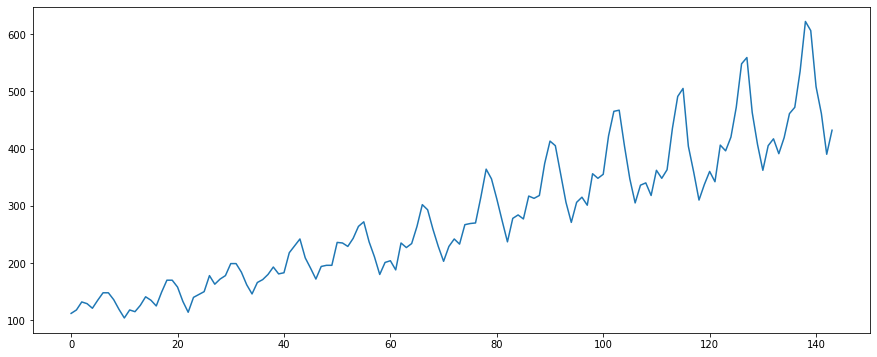

In [ ]:
serie = pd.read_csv("https://raw.githubusercontent.com/harishkandan/Air-passengers-time-series-forecasting/master/AirPassengers.csv", index_col=0)
serie = serie
serie = np.array(serie)
#serie
plt.figure(figsize = (15,6))
#plt.plot(serie[1:] - serie[:(len(serie) - 1)])
plt.plot(serie)


In [ ]:
serie_original = serie

scaler = MinMaxScaler(feature_range=(0,1))
serie = scaler.fit_transform(serie_original)

# Função que transforma a série em uma matriz com k colunas (entradas da rede)
def convert_to_matrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)


k = 12
x, y = convert_to_matrix(serie,k)


In [ ]:
x = x.reshape((-1,k,1))
treinox = x[0:(len(x) - 30)]
treinoy = y[0:(len(x) - 30)]
testex = x[(len(x) - 30):]
testey = y[(len(x) - 30):]

In [ ]:
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape = (k,1)))#, return_sequences=True))
#model.add(Dropout(0.3)) #, return_sequences = True))
#model.add(LSTM(128, activation='sigmoid', input_shape = (k,1)))
#model.add(LSTM(128, activation='tanh', input_shape = (k,1)))
#model.add(Dense(25, activation = "sigmoid"))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mape', 'mae', 'mse'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mape', 'mae', 'mse'])
history = model.fit(treinox, treinoy, epochs=100, validation_data=(testex, testey), verbose = 1)

Train on 102 samples, validate on 30 samples
Epoch 1/100
102/102 [==============================] - 0s 4ms/step - loss: 0.0060 - mape: 33.5470 - mae: 0.0617 - mse: 0.0060 - val_loss: 0.0199 - val_mape: 15.2212 - val_mae: 0.1065 - val_mse: 0.0199
Epoch 2/100
102/102 [==============================] - 0s 678us/step - loss: 0.0051 - mape: 23.6971 - mae: 0.0514 - mse: 0.0051 - val_loss: 0.0179 - val_mape: 15.3535 - val_mae: 0.1040 - val_mse: 0.0179
Epoch 3/100
102/102 [==============================] - 0s 652us/step - loss: 0.0049 - mape: 30.4063 - mae: 0.0558 - mse: 0.0049 - val_loss: 0.0167 - val_mape: 17.0900 - val_mae: 0.1077 - val_mse: 0.0167
Epoch 4/100
102/102 [==============================] - 0s 675us/step - loss: 0.0046 - mape: 27.4123 - mae: 0.0522 - mse: 0.0046 - val_loss: 0.0188 - val_mape: 14.9100 - val_mae: 0.1038 - val_mse: 0.0188
Epoch 5/100
102/102 [==============================] - 0s 664us/step - loss: 0.0047 - mape: 23.0104 - mae: 0.0502 - mse: 0.0047 - val_loss: 0.016

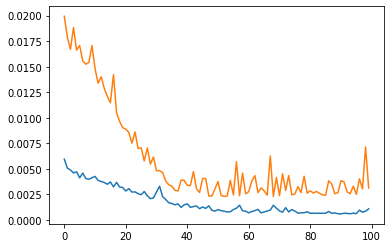

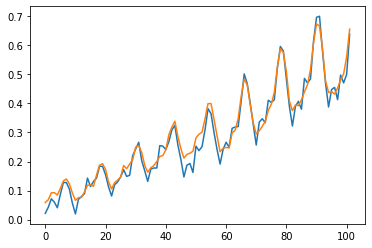

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()
plt.plot(treinoy)
plt.plot(model.predict(treinox))

30/30 [==============================] - 0s 130us/step


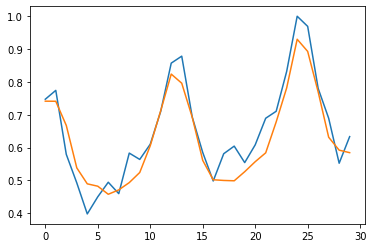

In [ ]:
model.evaluate(testex, testey)

plt.plot(testey)
plt.plot(model.predict(testex))

In [ ]:
preds = model.predict(testex)
preds_original = scaler.inverse_transform(preds)

y_original = scaler.inverse_transform(testey)

mape = np.mean(abs((y_original - preds_original)/abs(y_original))*100)
mae = np.mean(abs(y_original - preds_original))
mse = np.mean((y_original - preds_original)**2)


print("MAPE com prev. 1 passo a frente: {}%".format(round(mape,3)))
print("MSE com prev. 1 passo a frente: {}".format(round(mse)))
print("MAE com prev. 1 passo a frente: {}".format(round(mae,3)))
print("Vício: {}".format(np.mean(preds_original - y_original).round(3)))


MAPE com prev. 1 passo a frente: 5.535%
MSE com prev. 1 passo a frente: 842.0
MAE com prev. 1 passo a frente: 23.886
Vício: -13.011


MAPE: 8.913%
MAE: 40.175
MSE: 2443.125
Vício: -19.5


Text(0.5, 0, 'h')

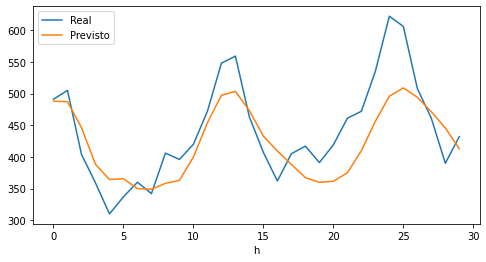

In [ ]:
testex2 = testex.copy() #AJEITAR ISSO AQUI PQ N TA PEGANDO O ÚLTIMO ÍNDICE
for i in range(len(testey)-1):
  if i == 0:
    ypred = model.predict(testex2[0].reshape(1,k,1)).reshape(1,)
    testex2[1] = np.append(testex2[0, 1:k], ypred).reshape(k,1)
  else:
    ypred = np.append(ypred, model.predict(testex2[i].reshape(1,k,1)).reshape(1,))  
    testex2[i+1] = np.append(testex2[i, 1:k], ypred[i]).reshape(k,1)

ypred = np.append(ypred, model.predict(testex2[-1].reshape(1,k,1)).reshape(1,))  


preds_original = scaler.inverse_transform(ypred.reshape((-1,1)))

y_original = scaler.inverse_transform(testey)

mape = np.mean(abs((y_original - preds_original)/abs(y_original))*100)
mae = np.mean(abs(y_original - preds_original))
mse = np.mean((y_original - preds_original)**2)

print("MAPE: " + str(round(mape,3)) + "%")
print("MAE: " + str(round(mae,3)))
print("MSE: " + str(round(mse,3)))
print("Vício: {}".format(np.mean(preds_original - y_original).round(3)))


plt.figure(figsize = (8, 4))
plt.plot(y_original)
plt.plot(preds_original)
plt.legend(("Real", "Previsto"))
plt.xlabel("h")